![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes_df = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
age_crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


## I want to identify what is the peak crime hour in LA

In [2]:
crimes["Heure"] = crimes['TIME OCC'].str[:2].astype(int)
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Heure
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9


In [4]:
heurous = crimes.groupby('Heure').size()
heurous.sort_values()

Heure
5      3171
4      3238
3      3943
2      4726
7      5403
6      5621
1      5836
9      7092
23     7419
8      7523
10     8440
13     8474
22     8531
21     8701
0      8728
11     8787
14     8872
16     9224
19     9262
15     9393
20     9579
17     9964
18    10125
12    13663
dtype: int64

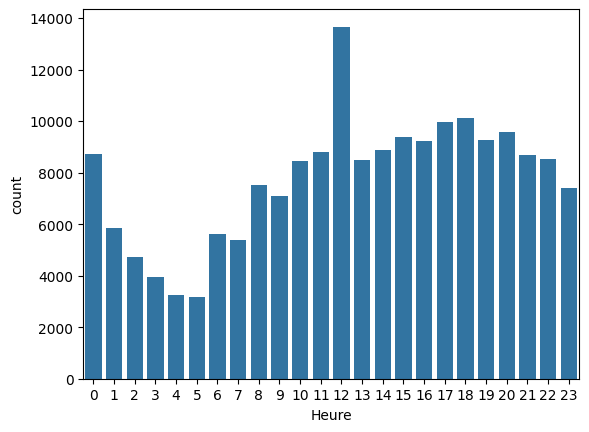

In [5]:
sns.countplot(data=crimes, x="Heure")
plt.show()

In [ ]:
peak_crime_hour = int(12)

*The peak crime hour in LA city is <span style="color: green">noon</span>*

## I want to identify the peak night crime location in LA

In [6]:
def toString(theli):
    theli = ''.join(theli)
    return theli

def timedot(x):
    mokou = list(x)
    mokou.insert(2, ":")
    mokou = toString(mokou)
    return mokou

crimes_df["TIME OCC"] = crimes_df["TIME OCC"].apply(lambda x: timedot(x))

In [7]:
crimes_df["TIME OCC"] = pd.to_datetime(crimes_df["TIME OCC"], format='%H:%M').dt.time

In [9]:
start_night_1 = pd.to_datetime("00:00").time()
end_night_1 = pd.to_datetime("04:00").time()
start_night_2 = pd.to_datetime("22:00").time()
end_night_2 = pd.to_datetime("23:59").time()

df_nightCrimes = crimes_df[
    ((crimes_df["TIME OCC"] >= start_night_1) & (crimes_df["TIME OCC"] < end_night_1)) |
    ((crimes_df["TIME OCC"] >= start_night_2) & (crimes_df["TIME OCC"] <= end_night_2))
]

In [10]:
df_nightCrimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
8,231207476,2023-02-27,2020-08-15,00:01:00,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV
10,221711184,2022-06-15,2020-05-15,01:55:00,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV
30,221314362,2022-07-11,2020-04-07,00:01:00,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL
33,231307252,2023-03-03,2020-07-05,23:05:00,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY
36,221614254,2022-11-13,2020-01-01,00:01:00,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV


In [11]:
area_night_crimes = df_nightCrimes.groupby('AREA NAME').size()
top_area_night_crimes = area_night_crimes.sort_values(ascending=False).head(10)

In [12]:
top_area_night_crimes

AREA NAME
Central        3312
Hollywood      2699
77th Street    2558
Southwest      2347
Southeast      2218
Newton         2142
Olympic        2137
Pacific        1916
Rampart        1860
N Hollywood    1855
dtype: int64

In [13]:
top_area_night_crimes = top_area_night_crimes.to_frame(name="crimes_values")

In [14]:
top_area_night_crimes.reset_index(inplace=True)

In [15]:
top_area_night_crimes

,AREA NAME,crimes_values
0,Central,3312
1,Hollywood,2699
2,77th Street,2558
3,Southwest,2347
4,Southeast,2218
5,Newton,2142
6,Olympic,2137
7,Pacific,1916
8,Rampart,1860
9,N Hollywood,1855


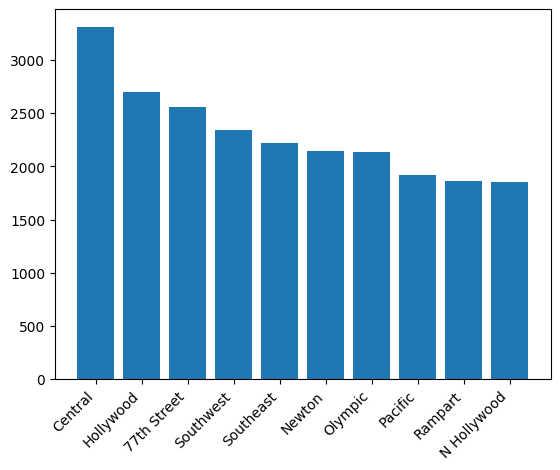

In [16]:
plt.bar(top_area_night_crimes['AREA NAME'], top_area_night_crimes['crimes_values'])
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

*As we can see, <span style="color: red">Central</span> is most dangerous area for people during the night*